<h1> Data Analysis Project</h1>
<h2> United Kingdom </h2>
<h3> Inclusive years: 2019-2022</h3>
<h4> Analyst: Irish Valerie Martinez</h4>

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2> Data Preparation</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings

warnings.filterwarnings ('ignore')

<h1>Importing Libraries</h1>

In [3]:
accident = pd.read_csv('accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident['Accident_Severity'] = accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [6]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [7]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions             object
District Area                object
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions      object
Road_Type                    object
Urban_or_Rural_Area          object
Weather_Conditions           object
Vehicle_Type                 object
dtype: object

<h3>Data Cleansing</h3>

In [8]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface conditions')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather conditions')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [10]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [11]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1> Converting object data type to date time date types</h1>

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [13]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [14]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h1> Adjusting Data Types</h1>

In [15]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> Extracting Date info unsing pandas date time</h1>

In [16]:
# accident['Accident Date'] = accident['Accident Date'].str.strip()
# accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [17]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [18]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

<h2> Data ANalytics</h2>
<h4> Analyzing each Field from Data Set</h4>
<h3> Univariate</h3>

In [19]:
df_2019 = accident[accident['Year'] == 2019]
df_2020 = accident[accident['Year'] == 2020]
df_2021 = accident[accident['Year'] == 2021]

new_df = df_2019[df_2019['Accident_Severity'] != 'Slight']
new_dff = df_2020[df_2020['Accident_Severity'] != 'Slight']
new_dfff = df_2020[df_2020['Accident_Severity'] != 'Unallocated']
new_dffff = df_2021[df_2021['Accident_Severity'] != 'Slight']

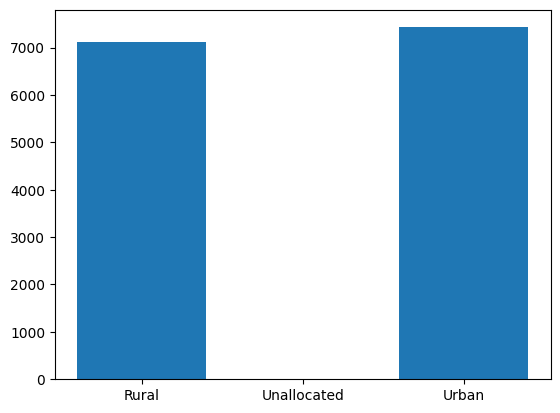

In [20]:
visual1 = new_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual1['Urban_or_Rural_Area']
y = visual1['Number_of_Casualties']

plt.bar(x,y)
plt.show()

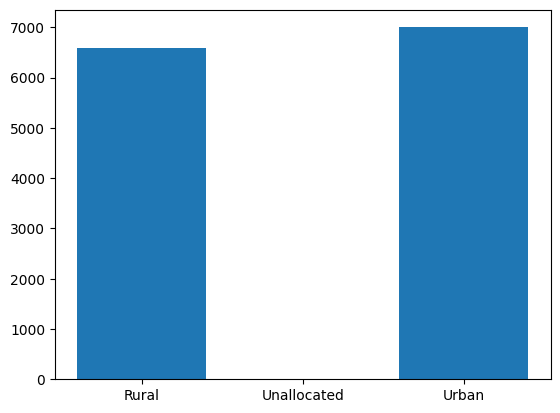

In [21]:
visual1 = new_dff.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual1['Urban_or_Rural_Area']
y = visual1['Number_of_Casualties']

plt.bar(x,y)
plt.show()

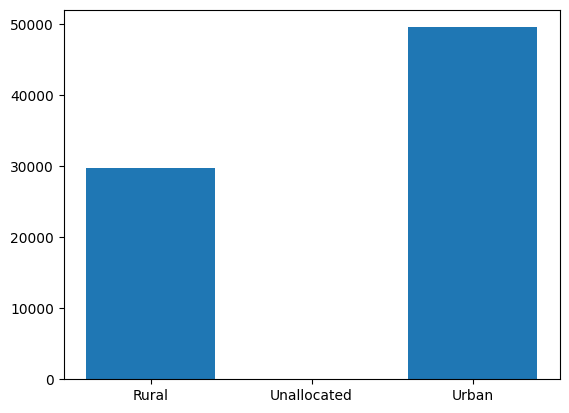

In [22]:
visual1 = new_dfff.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual1['Urban_or_Rural_Area']
y = visual1['Number_of_Casualties']

plt.bar(x,y)
plt.show()

<h1> Seasonal Analysis</h1>

In [23]:
# accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)

# accidents_per_month_severity.ploy(kind='bar', stacked=True)
# plt.title('Accid

<h2> Univariate Analysis from 2019</h2>
<h3> How many incidents happened under light conditions</h3>

<h1> Insight 1: Daylight Constitute to 132% of the total accident from year 2019</h1>

In [24]:
df_2019['Light_Conditions'].value_counts().sum()

71867

<h1> Insight 2: Latitude and LOnigtude has no correlation when it come to road accidents <h1>

In [25]:
latg = accident['Latitude'].corr(accident['Longitude'])
latg

-0.3981137948101014

<h1> Insight 3: The vehicle accidents is related to the frequency of the number of casualties.</h1>

In [26]:
rsclc = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])
rsclc

0.2288888612692756

In [27]:
rsclc = np.round(accident.groupby(['District Area','Urban_or_Rural_Area'])['Number_of_Casualties'].mean(),1)
rsclc.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
District Area,,,
Aberdeen City,1.2,NaN,1.1
Aberdeenshire,1.3,NaN,1.1
Adur,1.5,NaN,1.3
Allerdale,1.5,NaN,1.3
Alnwick,1.5,NaN,NaN
...,...,...,...
Wychavon,1.5,NaN,1.2
Wycombe,1.5,NaN,1.3
Wyre,1.5,NaN,1.3


In [28]:
rsclc = np.round(accident.groupby(['District Area','Urban_or_Rural_Area'])['Number_of_Vehicles'].mean(),1)
rsclc.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
District Area,,,
Aberdeen City,1.7,NaN,1.6
Aberdeenshire,1.6,NaN,1.6
Adur,2.0,NaN,1.9
Allerdale,1.8,NaN,1.8
Alnwick,1.6,NaN,NaN
...,...,...,...
Wychavon,1.8,NaN,1.8
Wycombe,1.9,NaN,1.9
Wyre,1.9,NaN,1.9


<h1> Insight 4: Most Accidents that happened all throughtout 2019 to 2022 is in Aberdeenshire in Rural Area</h1>

In [29]:
surface = accident.groupby(['District Area','Urban_or_Rural_Area']).count()
surface

Index  Accident_Severity  Accident Date  \
District Area Urban_or_Rural_Area                                            
Aberdeen City Rural                  207                207             78   
              Unallocated              0                  0              0   
              Urban                 1116               1116            463   
Aberdeenshire Rural                 1781               1781            698   
              Unallocated              0                  0              0   
...                                  ...                ...            ...   
Wyre Forest   Unallocated              0                  0              0   
              Urban                  550                550            224   
York          Rural                  706                706            294   
              Unallocated              0                  0              0   
              Urban                 1191               1191            458   

                                   Latitude  Light_Conditions  Longitude  \
District Area Urban_or_Rural_Area                                          
Aberdeen City Rural                     207               207        207   
              Unallocated                 0                 0          0   
              Urban                    1116              1116       1116   
Aberdeenshire Rural                    1781              1781       1781   
              Unallocated                 0                 0          0   
...                                     ...               ...        ...   
Wyre Forest   Unallocated                 0                 0          0   
              Urban                     550               550        550   
York          Rural                     706               706        706   
              Unallocated                 0                 0          0   
              Urban                    1191              1191       1191   

                                   Number_of_Casualties  Number_of_Vehicles  \
District Area Urban_or_Rural_Area                                             
Aberdeen City Rural                                 207                 207   
              Unallocated                             0                   0   
              Urban                                1116                1116   
Aberdeenshire Rural                                1781                1781   
              Unallocated                             0                   0   
...                                                 ...                 ...   
Wyre Forest   Unallocated                             0                   0   
              Urban                                 550                 550   
York          Rural                                 706                 706   
              Unallocated                             0                   0   
              Urban                                1191                1191   

                                   Road_Surface_Conditions  Road_Type  \
District Area Urban_or_Rural_Area                                       
Aberdeen City Rural                                    207        207   
              Unallocated                                0          0   
              Urban                                   1116       1116   
Aberdeenshire Rural                                   1781       1781   
              Unallocated                                0          0   
...                                                    ...        ...   
Wyre Forest   Unallocated                                0          0   
              Urban                                    550        550   
York          Rural                                    706        706   
              Unallocated                                0          0   
              Urban                                   1191       1191   

                                   Weather_Conditions

<h1> Insight 5: The number of casualties has been decreasing each year, considering the severity of the fatalities caused by accidents.</h1>

In [30]:
casualties_per_year = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Year').size()
casualties_per_year

Year
2019.0    1116
2020.0     942
2021.0     823
2022.0     623
dtype: int64

<h1> Insight 6: Single carriageway is the most prone to accident when it comes to Road types</h1>

In [31]:
casualties_road_types = accident[accident['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()
casualties_road_types

Road_Type
Single carriageway    6527
Dual carriageway      1815
Roundabout             142
One way street          95
Slip road               49
unaccounted             33
Name: count, dtype: int64

<h1> Insight 7: The most accidents that happened all throughout 2019 to 2022 is in Single Carriageway with half a million Slight Accident Severity </h1>

In [32]:
accident_road = accident.groupby(['Road_Type','Accident_Severity']).count()
accident_road


Index  Accident Date  Latitude  \
Road_Type          Accident_Severity                                    
Dual carriageway   Fatal                1815            733      1815   
                   Serious             11746           4650     11746   
                   Slight              85863          34249     85863   
One way street     Fatal                  95             47        95   
                   Serious              1655            660      1655   
                   Slight              11809           4761     11809   
Roundabout         Fatal                 142             66       142   
                   Serious              3665           1441      3665   
                   Slight              40185          16023     40185   
Single carriageway Fatal                6527           2617      6527   
                   Serious             70059          28108     70059   
                   Slight             415557         167014    415557   
Slip road          Fatal                  49             27        49   
                   Serious               611            243       611   
                   Slight               6381           2552      6381   
unaccounted        Fatal                  33             14        33   
                   Serious               481            191       481   
                   Slight               4006           1611      4006   

                                      Light_Conditions  District Area  \
Road_Type          Accident_Severity                                    
Dual carriageway   Fatal                          1815           1815   
                   Serious                       11746          11746   
                   Slight                        85863          85863   
One way street     Fatal                            95             95   
                   Serious                        1655           1655   
                   Slight                        11809          11809   
Roundabout         Fatal                           142            142   
                   Serious                        3665           3665   
                   Slight                        40185          40185   
Single carriageway Fatal                          6527           6527   
                   Serious                       70059          70059   
                   Slight                       415557         415557   
Slip road          Fatal                            49             49   
                   Serious                         611            611   
                   Slight                         6381           6381   
unaccounted        Fatal                            33             33   
                   Serious                         481            481   
                   Slight                         4006           4006   

                                      Longitude  Number_of_Casualties  \
Road_Type          Accident_Severity                                    
Dual carriageway   Fatal                   1815                  1815   
                   Serious                11746                 11746   
                   Slight                 85863                 85863   
One way street     Fatal                     95                    95   
                   Serious                 1655                  1655   
                   Slight                 11809                 11809   
Roundabout         Fatal                    142                   142   
                   Serious                 3665                  3665   
                   Slight                 40185                 40185   
Single carriageway Fatal                   6527                  6527   
                   Serious                70059                 70059   
                   Slight                415557                415557   
Slip road          Fatal                     49                    49   
                   Ser

<h1> Insight 8: The area with most accident is Urban Areas</h1>

In [33]:
urban_rural = accident['Urban_or_Rural_Area'].value_counts()
urban_rural

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1> Insight 9: The district wiht most Accident is in Birmingham</h1>

In [34]:
district_areas = accident['District Area'].value_counts().sort_values(ascending=False)
district_areas

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1> Insight 10: Daylight has the most conditions when it comes to accident</h1>

In [35]:
condition_counts = accident['Light_Conditions'].value_counts()
condition_counts

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1> Insight 11: The number of vehicles in urban or rural areas has high impacts to the occurrence of accidents.</h1>

In [36]:
f_stats, p_value = f_oneway(accident[accident['Urban_or_Rural_Area'] == 'Urban'] ['Number_of_Vehicles'],
                            accident[accident['Urban_or_Rural_Area'] == 'Rural'] ['Number_of_Vehicles'])
print(p_value)

9.09607802972544e-198


<h1> Insight 12: The road surface conditions affects on how many vehicles are invovled in a accident</h1>

In [37]:
f_stats, p_value = f_oneway(accident[accident['Road_Surface_Conditions'] == 'Dry'] ['Number_of_Vehicles'],
                            accident[accident['Road_Surface_Conditions'] == 'Wet or damp'] ['Number_of_Vehicles'],
                            accident[accident['Road_Surface_Conditions'] == 'Snow'] ['Number_of_Vehicles'])
print(p_value)

1.2783031353966655e-30


<h1> Insight 13: The condition of the surface influences the number of casualties in an accident.</h1>

In [38]:
f_stats, p_value = f_oneway(accident[accident['Road_Surface_Conditions'] == 'Dry'] ['Number_of_Casualties'],
                            accident[accident['Road_Surface_Conditions'] == 'Wet or damp'] ['Number_of_Casualties'],
                            accident[accident['Road_Surface_Conditions'] == 'Snow'] ['Number_of_Casualties'])
print(p_value)

3.1520213411478814e-246


<h1> Insight 14: Bolsover has the highest rate of accidents among the listed areas.</h1>

In [39]:
accident.groupby('District Area')['Number_of_Vehicles'].mean().sort_values(ascending=False)

District Area
Bolsover            2.040501
Runnymede           2.038076
St. Albans          2.032631
Dartford            2.031195
South Bucks         2.022239
                      ...   
Aberdeenshire       1.553368
Clackmannshire      1.487500
Western Isles       1.455056
Orkney Islands      1.393162
Shetland Islands    1.353383
Name: Number_of_Vehicles, Length: 422, dtype: float64

<h1> Insight 15: Alongside it, Blaeu Gwent also has the highest rate of casualties, with a mean of 1.693694</h1>

In [40]:
accident.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False)

District Area
Blaeu Gwent               1.693694
West Somerset             1.613990
Derwentside               1.606186
Chester-le-Street         1.603306
Durham                    1.580431
                            ...   
Kensington and Chelsea    1.136120
Westminster               1.134069
Camden                    1.132783
Islington                 1.126082
City of London            1.126044
Name: Number_of_Casualties, Length: 422, dtype: float64

<h1> Insight 16:Accidents occur most frequently during fog or mist, and these conditions also result in the highest number of casualties, with a mean of 1.452948 per accident.</h1>

In [41]:
accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False)

Weather_Conditions
Fog or mist                       1.452948
Snowing + high winds              1.418079
Raining + high winds              1.416641
Raining no high winds             1.408214
Fine + high winds                 1.386018
Other                             1.354869
Fine no high winds                1.350480
Snowing no high winds             1.341776
unaccounted weather conditions    1.233720
Name: Number_of_Casualties, dtype: float64

<h1> Insight 17: The highest number of casualties occurs when the road surface is flooded to a depth of over 3 cm.</h1>

In [42]:
road = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False)
np.round(road, 1)

Road_Surface_Conditions
Flood over 3cm. deep          1.5
Wet or damp                   1.4
Snow                          1.4
Frost or ice                  1.3
Dry                           1.3
unknown surface conditions    1.2
Name: Number_of_Casualties, dtype: float64

<h1> Insight 18: The analysis shows that accidents involving frost or ice with a fatal severity result in the highest average number of casualties, with a mean of 2.316062 per accident</h1>

In [43]:
road = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity'])['Number_of_Casualties'].mean().sort_values(ascending=False)
road

Road_Surface_Conditions     Accident_Severity
Frost or ice                Fatal                2.316062
Flood over 3cm. deep        Fatal                2.260870
Wet or damp                 Fatal                2.038168
Snow                        Fatal                2.028571
Dry                         Fatal                1.826365
Flood over 3cm. deep        Serious              1.723684
Snow                        Serious              1.587611
Wet or damp                 Serious              1.569308
Frost or ice                Serious              1.562033
Flood over 3cm. deep        Slight               1.433492
Dry                         Serious              1.423278
Wet or damp                 Slight               1.377335
Snow                        Slight               1.330813
Dry                         Slight               1.312909
Frost or ice                Slight               1.311148
unknown surface conditions  Serious              1.300000
                          

<h1> Insight 19:The analysis shows that accidents on dual carriageways in rural areas with flood over 3cm deep result in the highest average number of casualties, with a mean of 1.604255 per accident.</h1>

In [44]:
road = accident.groupby(['Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].mean().sort_values(ascending=False)
road

Road_Surface_Conditions     Road_Type           Urban_or_Rural_Area
Flood over 3cm. deep        Dual carriageway    Rural                  1.604255
unknown surface conditions  Slip road           Rural                  1.600000
Snow                        unaccounted         Urban                  1.571429
Wet or damp                 Dual carriageway    Rural                  1.567012
Dry                         Dual carriageway    Rural                  1.563955
                                                                         ...   
unknown surface conditions  One way street      Unallocated                 NaN
                            Roundabout          Unallocated                 NaN
                            Single carriageway  Unallocated                 NaN
                            Slip road           Unallocated                 NaN
                            unaccounted         Unallocated                 NaN
Name: Number_of_Casualties, Length: 108, dtype: floa

<h1> Insight 20:The analysis shows that accidents on dual carriageways in rural areas with flood over 3cm deep during darkness with unlit lights result in the highest average number of casualties, with a mean of 6.000000 per accident.</h1>

In [45]:
road = accident.groupby(['Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Light_Conditions'])['Number_of_Casualties'].mean().sort_values(ascending=False)
road

Road_Surface_Conditions     Road_Type         Urban_or_Rural_Area  Light_Conditions           
Flood over 3cm. deep        Dual carriageway  Rural                Darkness - lights unlit        6.000000
Wet or damp                 One way street    Rural                Darkness - lights unlit        3.000000
Snow                        unaccounted       Rural                Darkness - lights lit          2.333333
Wet or damp                 Slip road         Urban                Darkness - no lighting         2.187500
Frost or ice                Dual carriageway  Urban                Darkness - lighting unknown    2.111111
                                                                                                    ...   
unknown surface conditions  unaccounted       Unallocated          Darkness - no lighting              NaN
                                                                   Daylight                            NaN
                                              Urb

<h1> Visualizing Correlation</h1>

<h1> Graph Visualization</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

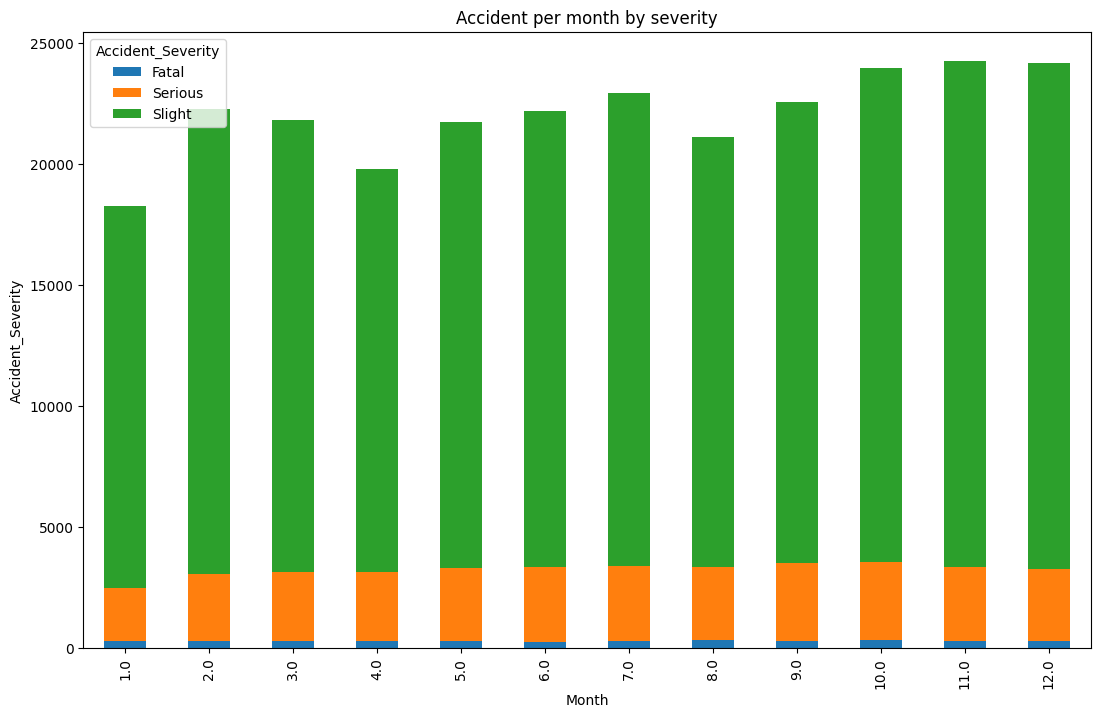

In [46]:
accident_month = accident.groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)
accident_month.plot(kind='bar', stacked=True)
plt.title('Accident per month by severity')
plt.xlabel('Month')
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(13,8)
plt.show
                                                                                 

<h1> Area Analysis</h1>

In [47]:
area_yr = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
this_table = area_yr.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
this_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134,201,75,115,52,146,120,120,129,158,...,162,273,92,109,132,135,170,127,97,194
2020.0,203,299,78,138,46,137,116,109,135,145,...,153,259,85,101,156,177,190,124,95,172
2021.0,204,257,66,111,9,129,94,110,152,139,...,125,255,92,111,126,138,171,130,96,215
2022.0,0,0,46,79,0,107,0,0,139,104,...,101,214,82,82,120,101,164,115,93,171


<h1> Line Plot</h1>

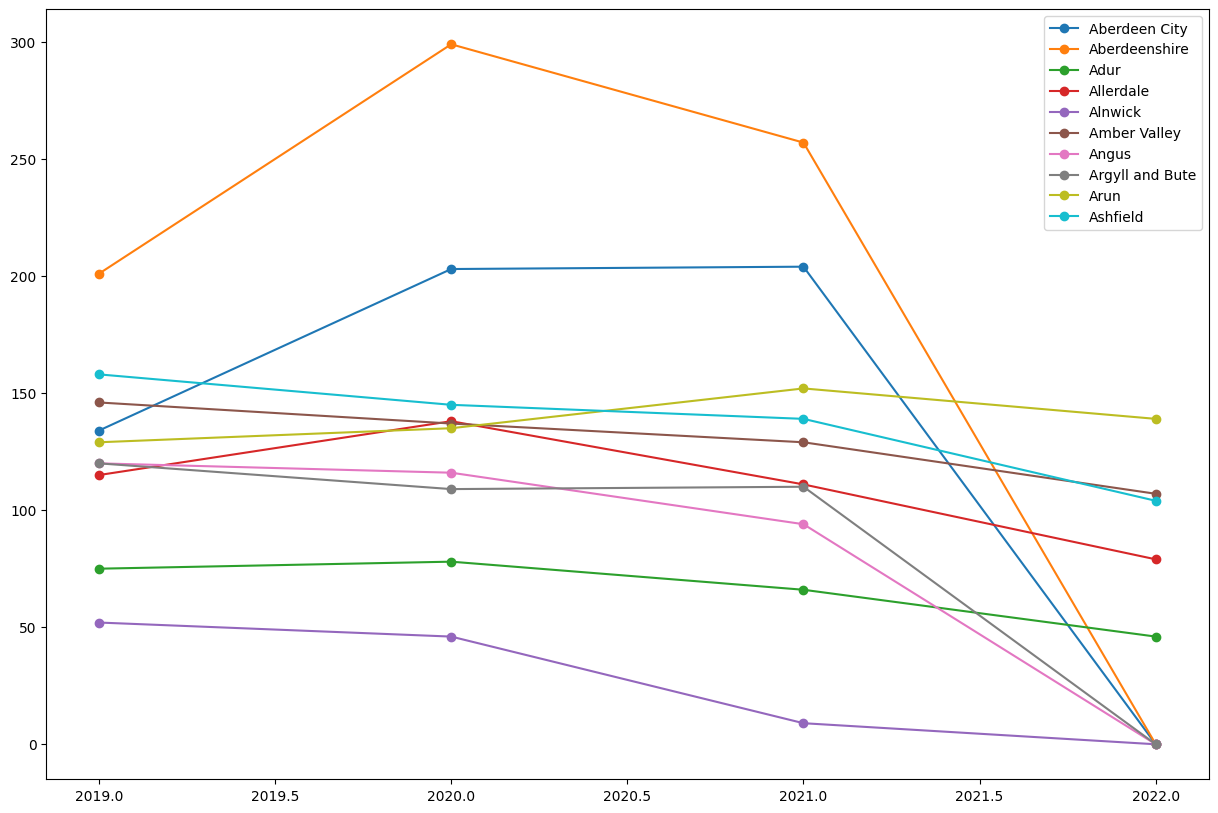

In [48]:
count = 0
for x in this_table:
    count += 1
    plt.plot(this_table.index,this_table[x], label = x, marker = 'o')
    if count == 10:
        break
plt.gcf().set_size_inches(15,10)
plt.legend()
plt.show()

<h1> Pie Chart</h1>

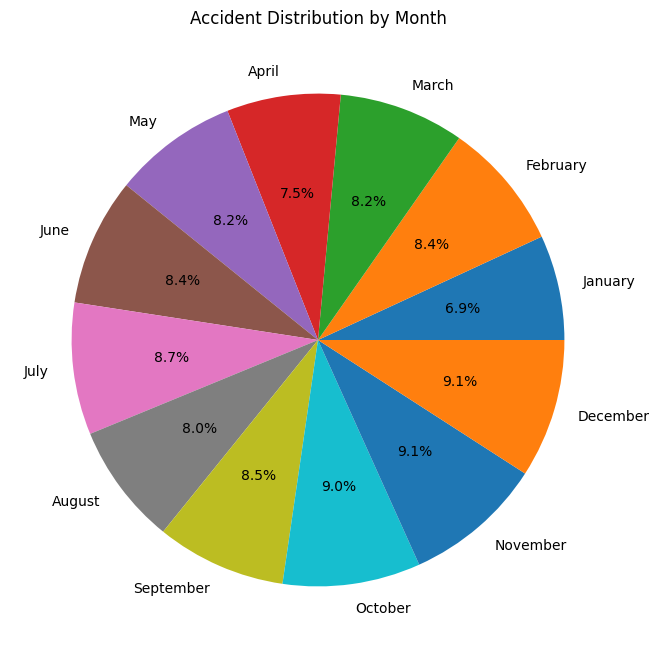

In [49]:
months = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

accident_total = accident_month.sum(axis=1)

accident_total.index = accident_total.index.map(months)

plt.figure(figsize=(8,8))
plt.pie(accident_total, labels=accident_total.index, autopct = '%1.1f%%')

plt.title('Accident Distribution by Month')
plt.show()


<h1> Accidetn severity and their urban or rural area</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

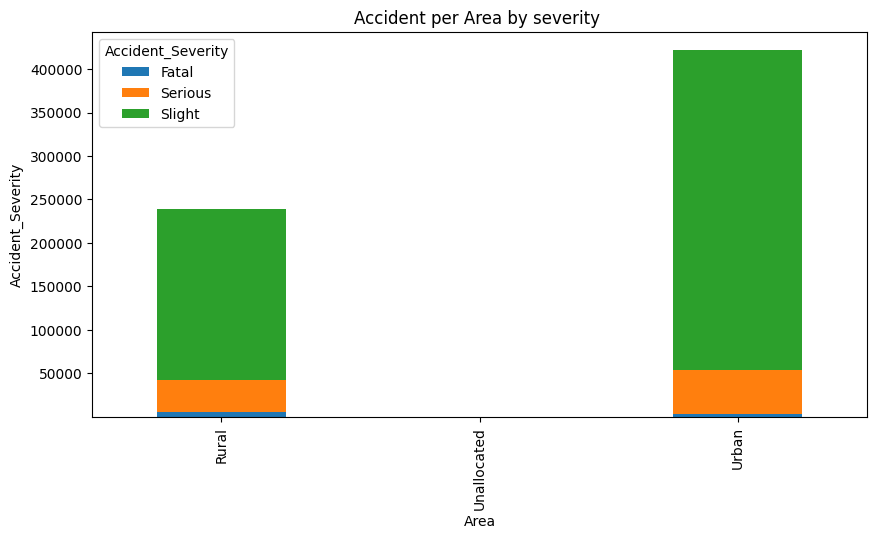

In [57]:
accident_severity= accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack().fillna(0)
accident_severity.plot(kind='bar', stacked=True)
plt.title('Accident per Area by severity ')
plt.xlabel('Area')
labels = ["Urban", "Rural"]
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(10,5)
plt.show

<h1> Accidents per Area by their Road type</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

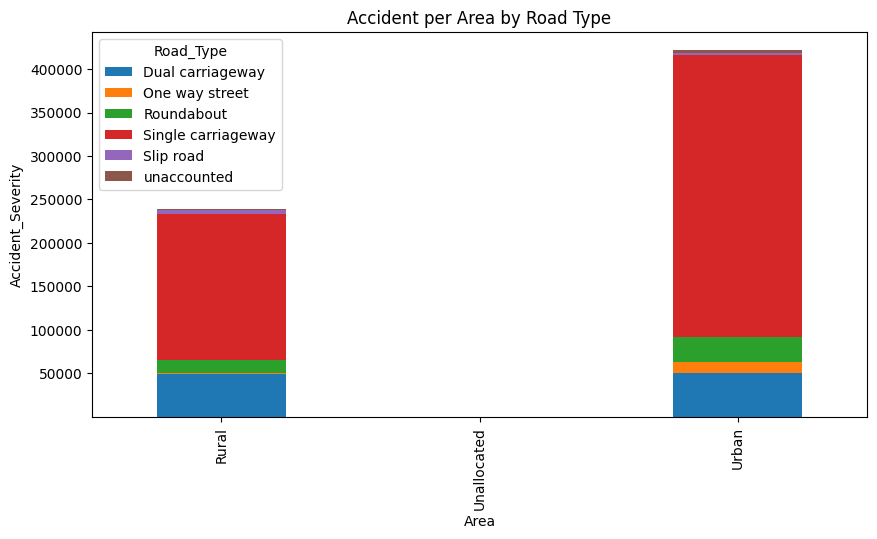

In [61]:
accident_severity= accident.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().fillna(0)
accident_severity.plot(kind='bar', stacked=True)
plt.title('Accident per Area by Road Type')
plt.xlabel('Area')
labels = ["Urban", "Rural"]
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(10,5)
plt.show

<h1> Casualties by Road type</h1>

In [76]:
casualties = accident.groupby(['Road_Type', 'Number_of_Casualties']).size().reset_index(name = 'Casualties_Count')
CAs = casualties.pivot(index = 'Number_of_Casualties', columns = 'Road_Type', values = 'Casualties_Count')
CAs

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Number_of_Casualties,,,,,,
1,69619,11656,35291,378621,5104,3750
2,19685,1451,6419,78510,1343,563
3,6102,303,1555,22306,386,124
4,2350,94,491,8042,122,57
5,941,38,165,2912,50,17
6,388,6,47,1063,17,4
7,159,4,10,355,8,3
8,67,1,5,138,2,1
9,36,2,2,71,1,0


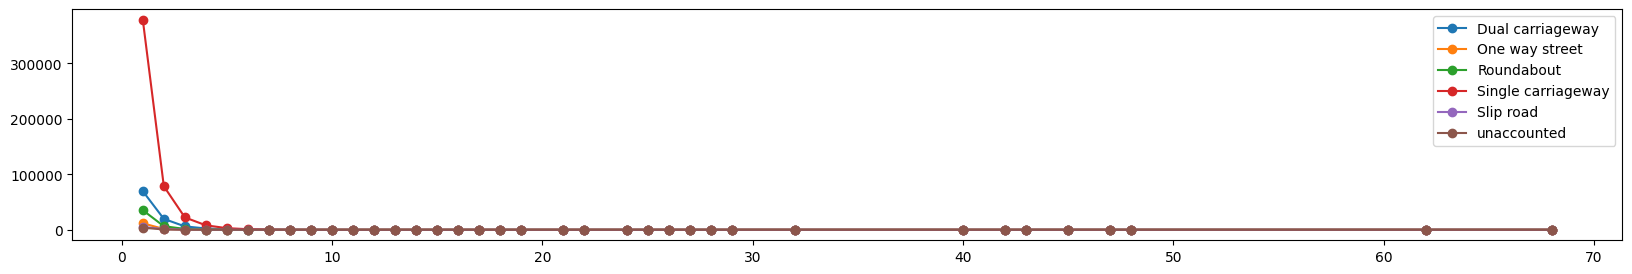

In [74]:
count = 0
for x in CAs:
    count += 1
    plt.plot(CAs.index,CAs[x], label = x, marker = 'o')
    if count == 10:
        break
plt.gcf().set_size_inches(20,3)
plt.legend()
plt.show()

<h1>Road type and their light conditions</h1>

In [84]:
RTLC = accident.groupby(['Road_Type', 'Light_Conditions']).size().reset_index(name = 'Conditions_Count')
rtlcs = RTLC.pivot(index = 'Light_Conditions', columns = 'Road_Type', values = 'Conditions_Count')
rtlcs

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Light_Conditions,,,,,,
Darkness - lighting unknown,905,124,470,4664,86,235
Darkness - lights lit,20242,3310,10528,93337,1315,603
Darkness - lights unlit,465,58,189,1770,34,27
Darkness - no lighting,7460,103,224,29107,357,186
Daylight,70352,9964,32581,363265,5249,3469


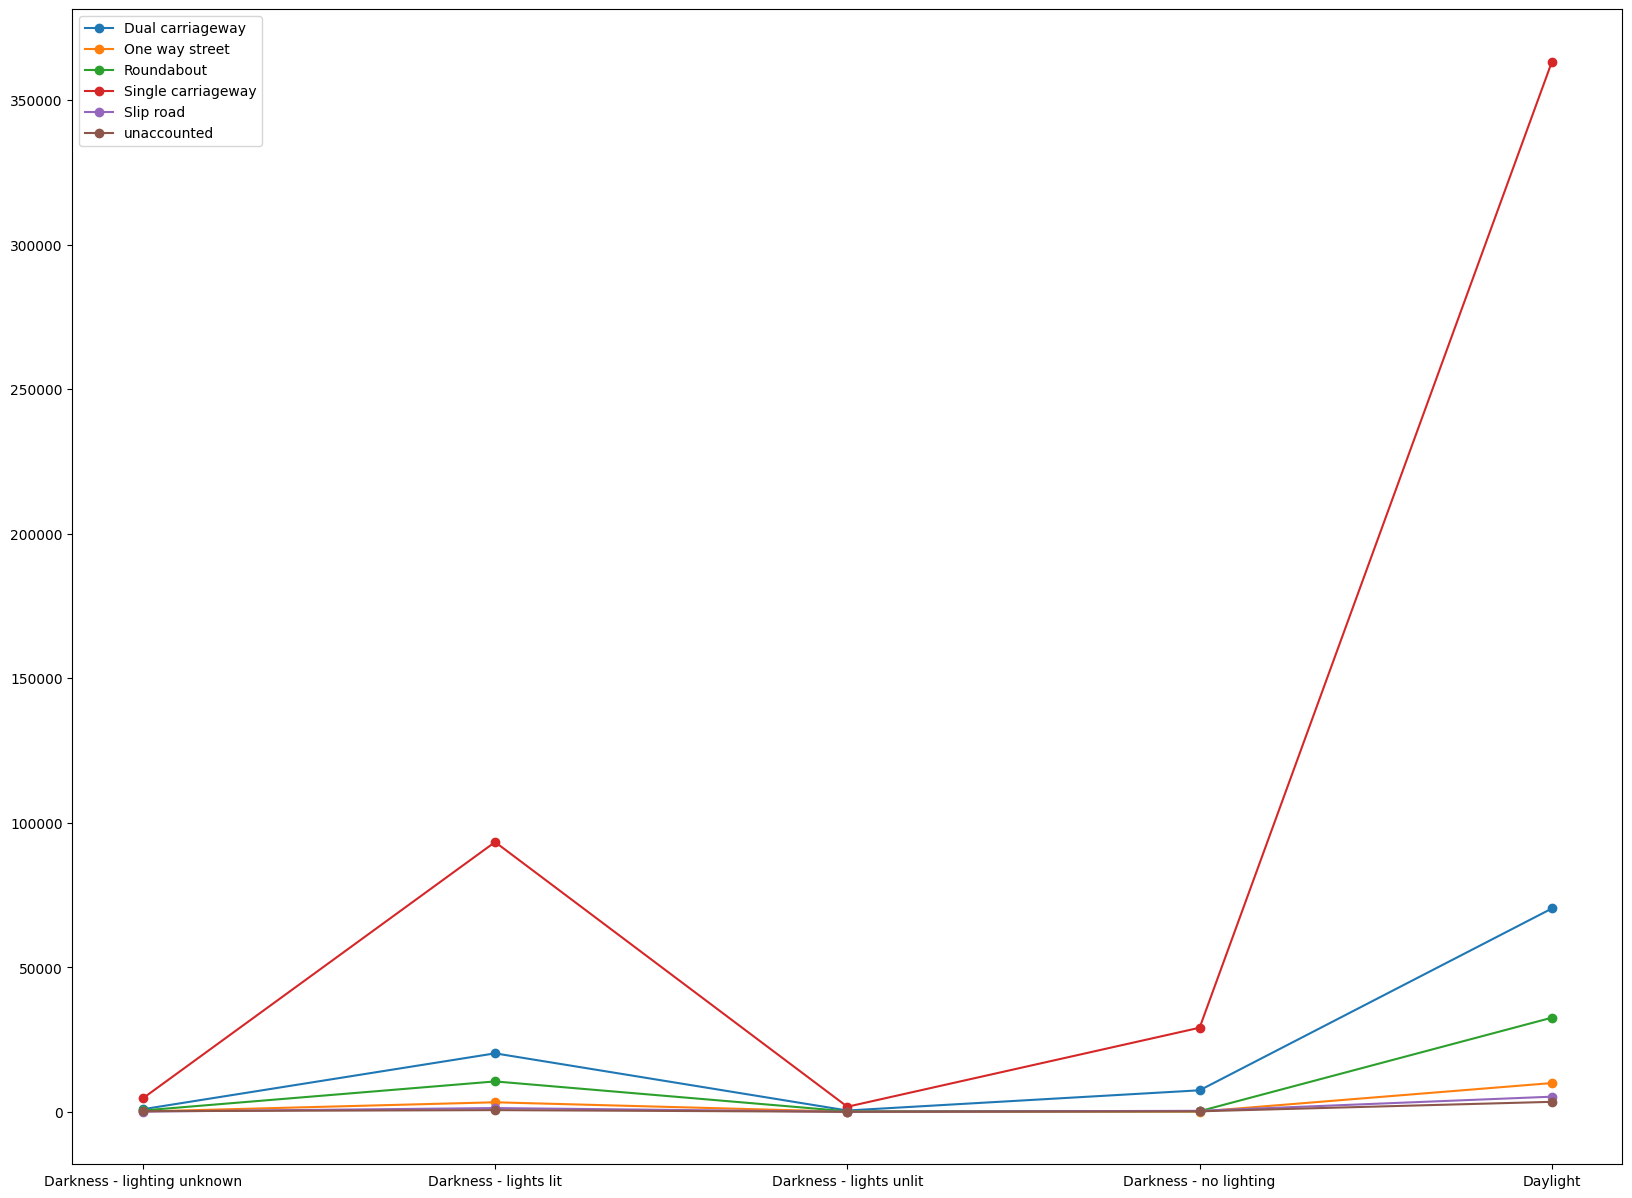

In [87]:
count = 0
for x in rtlcs:
    count += 1
    plt.plot(rtlcs.index,rtlcs[x], label = x, marker = 'o')
    if count == 10:
        break
plt.gcf().set_size_inches(20,15)
plt.legend()
plt.show()

<h1> Light Conditions</h1>

<Axes: xlabel='Accident_Severity'>

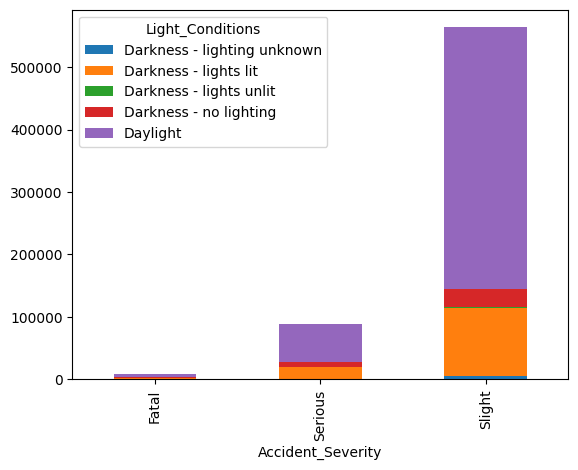

In [93]:
light = accident.groupby(['Accident_Severity', 'Light_Conditions']).size().unstack().fillna(0)
light.plot(kind='bar', stacked=True)

<Axes: xlabel='Light_Conditions'>

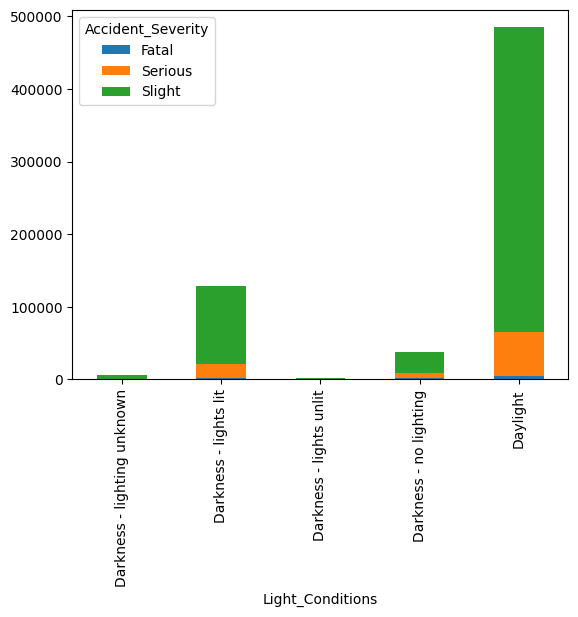

In [94]:
light = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack().fillna(0)
light.plot(kind='bar', stacked=True)

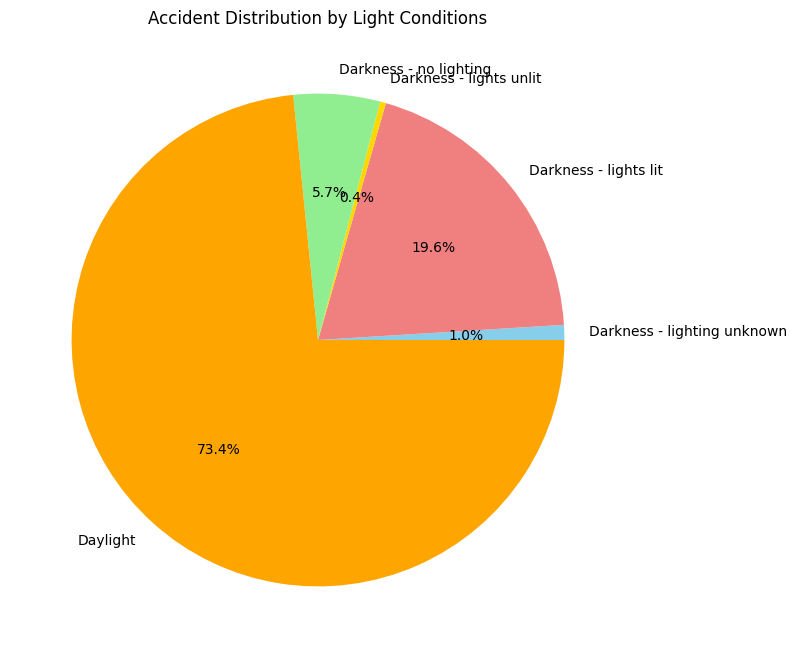

In [106]:
lights = {
    "Darkness - lighting unknown": "Darkness - lighting unknown", 
    "Darkness - lights lit": "Darkness - lights lit", 
    "Darkness - lights unlit": "Darkness - lights unlit", 
    "Darkness - no lighting": "Darkness - no lighting", 
    "Daylight": "Daylight"
}


accident_total = light.sum(axis=1)

accident_total.index = accident_total.index.map(lambda x: lights.get(x, x))

plt.figure(figsize=(8, 8))
plt.pie(accident_total, labels=accident_total.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'orange'])

plt.title('Accident Distribution by Light Conditions')
plt.show()

<h1>District Areas</h1>

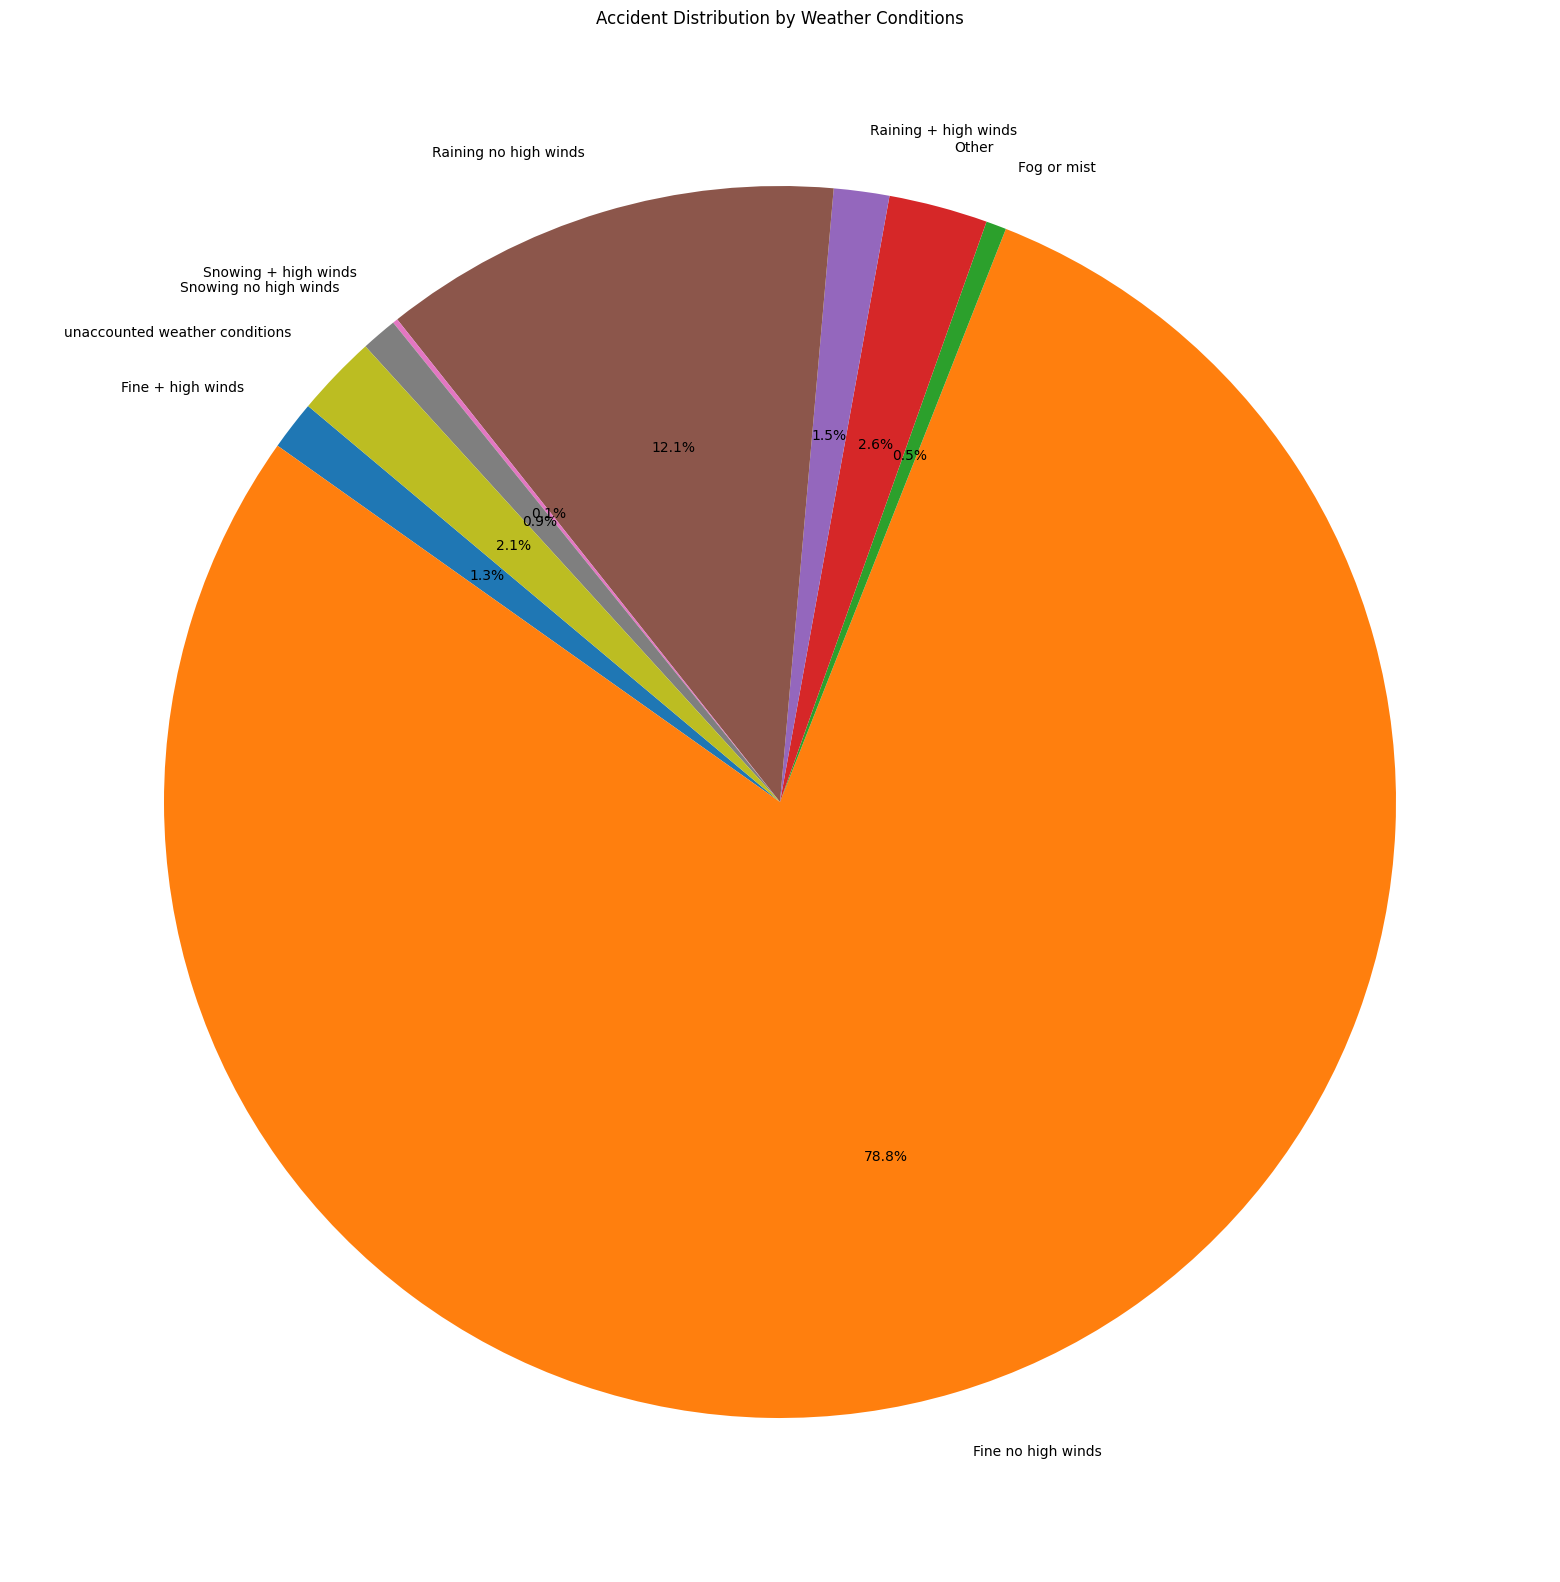

In [105]:
df_weather = accident.groupby('Weather_Conditions').size()
df_weather = df_weather[df_weather > 0] 

plt.figure(figsize=(20, 20))
plt.pie(df_weather, labels=df_weather.index, autopct='%1.1f%%', startangle=140)
plt.title('Accident Distribution by Weather Conditions')
plt.show()

<h1> Urban or Rural</h1>

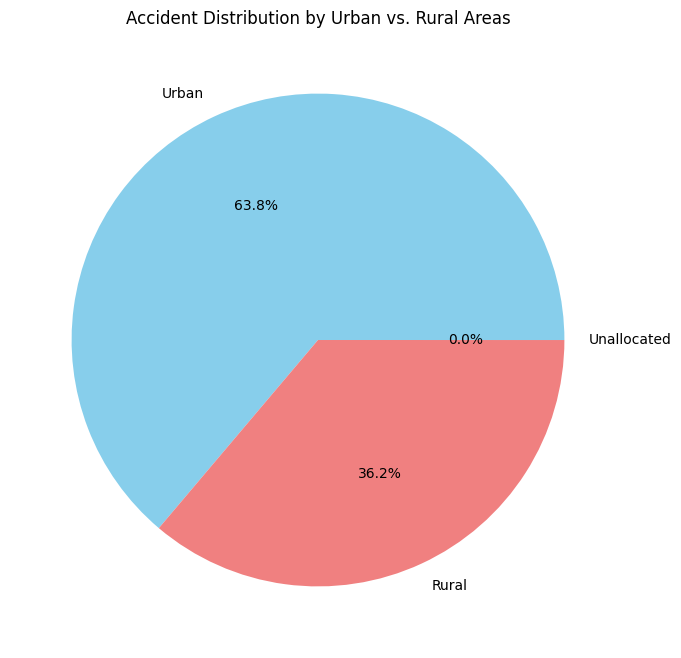

In [101]:
urban_rural_counts = accident['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])


plt.title('Accident Distribution by Urban vs. Rural Areas')


plt.show()

<h1> Road_Surface_Conditions</h1>

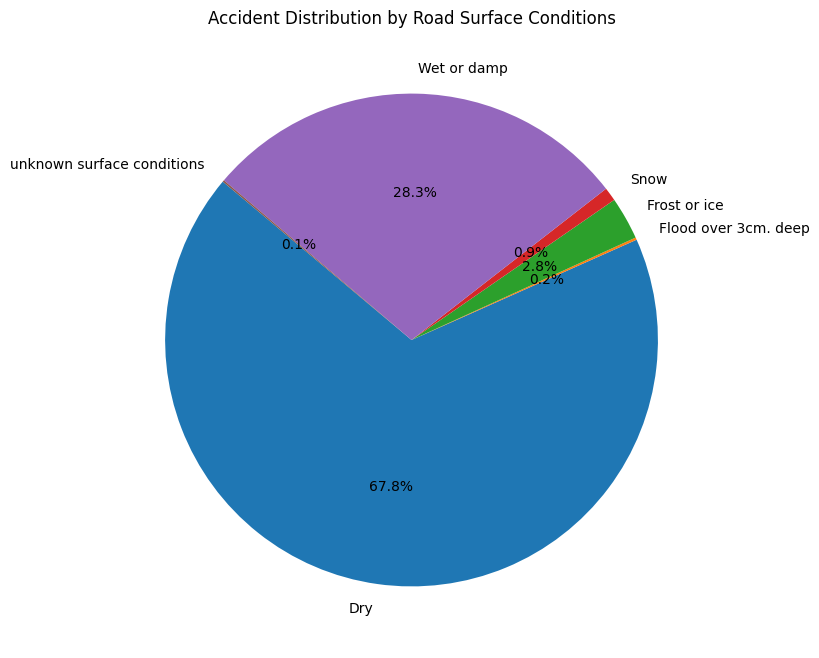

In [109]:
road_surface = accident.groupby('Road_Surface_Conditions').size()


road_surface = road_surface.dropna()


plt.figure(figsize=(8, 8))
plt.pie(road_surface, labels=road_surface.index, autopct='%1.1f%%', startangle=140)
plt.title('Accident Distribution by Road Surface Conditions')
plt.show()

<h1> Road_Surface_Conditions</h1>

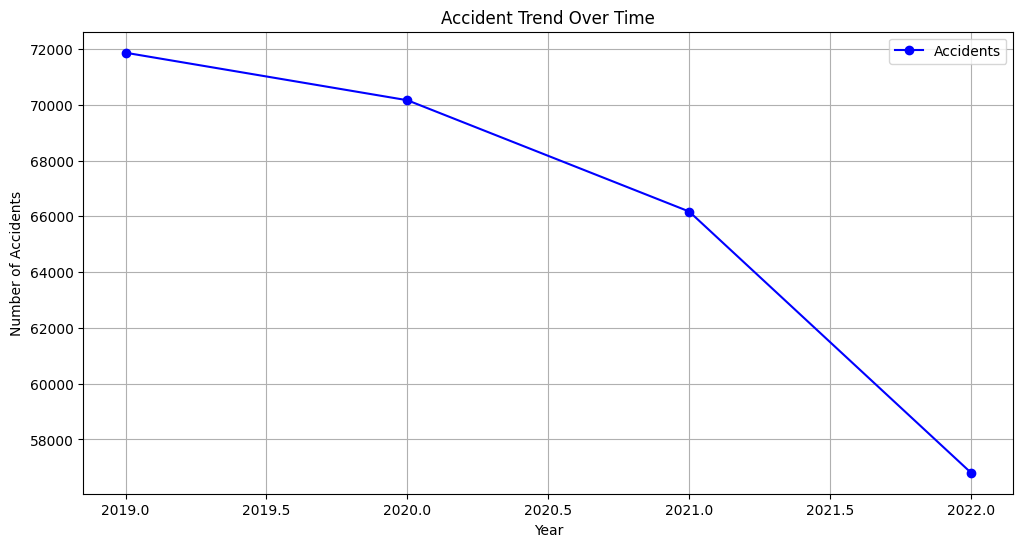

In [111]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
accident['Year'] = accident['Accident Date'].dt.year


accident_trend = accident.groupby('Year').size()


plt.figure(figsize=(12, 6))
plt.plot(accident_trend.index, accident_trend.values, marker='o', linestyle='-', color='b', label="Accidents")


plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accident Trend Over Time")
plt.grid(True)
plt.legend()
plt.show()

<h1> Casualties over time</h1>

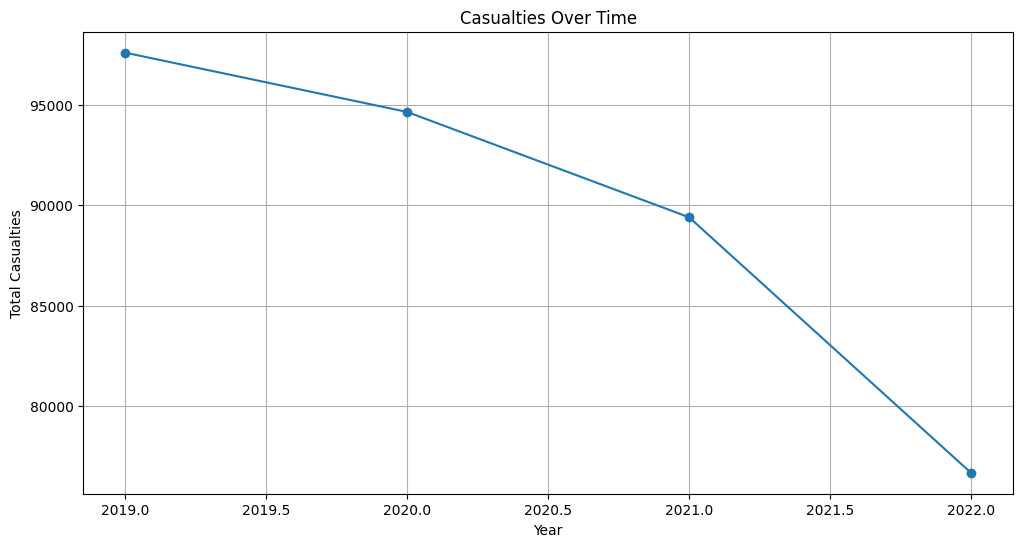

In [113]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
accident['Year'] = accident['Accident Date'].dt.year


casualties_per_year = accident.groupby('Year')['Number_of_Casualties'].sum()


plt.figure(figsize=(12, 6))
plt.plot(casualties_per_year.index, casualties_per_year, marker='o', linestyle='-')


plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.title('Casualties Over Time')
plt.grid(True)


plt.show()

<h1>Number of Vehicles in Accidents Over Time</h1>

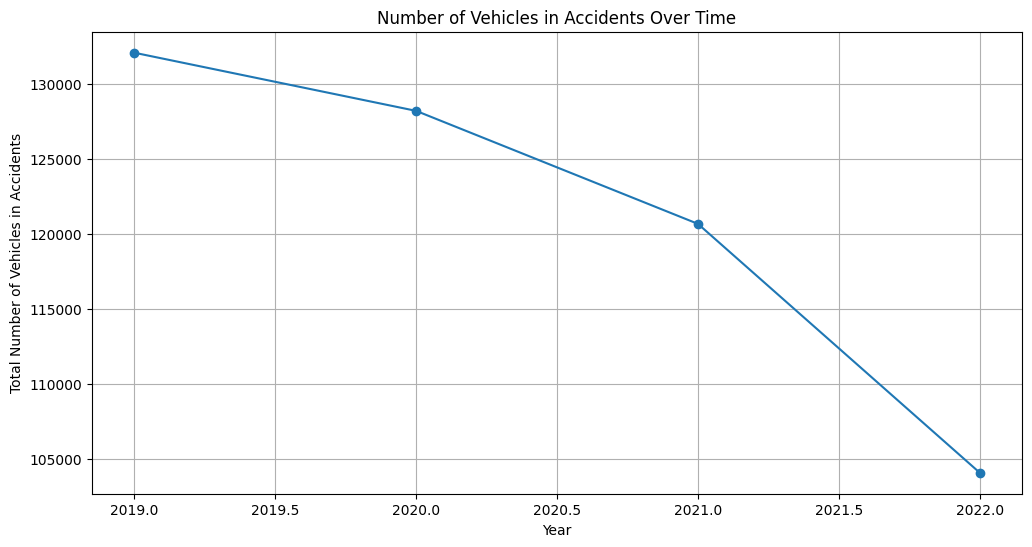

In [115]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
accident['Year'] = accident['Accident Date'].dt.year

vehicles_per_year = accident.groupby('Year')['Number_of_Vehicles'].sum()

plt.figure(figsize=(12, 6))
plt.plot(vehicles_per_year.index, vehicles_per_year, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles in Accidents')
plt.title('Number of Vehicles in Accidents Over Time')
plt.grid(True)
plt.show()

<h1>Accident Severity vs. Number of Accidents</h1>

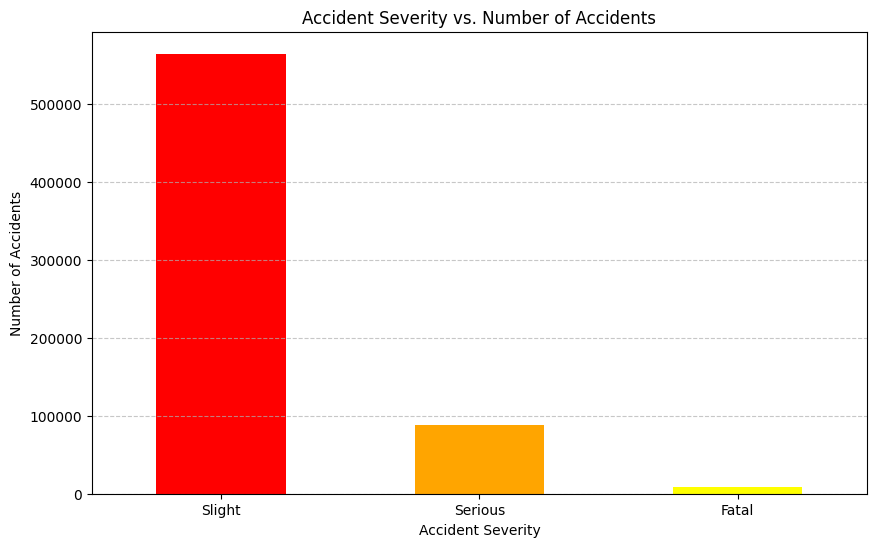

In [116]:
severity_counts = accident['Accident_Severity'].value_counts()


plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=['red', 'orange', 'yellow'])


plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity vs. Number of Accidents')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

<h1>Vehicle Type vs. Number of Accidents</h1>

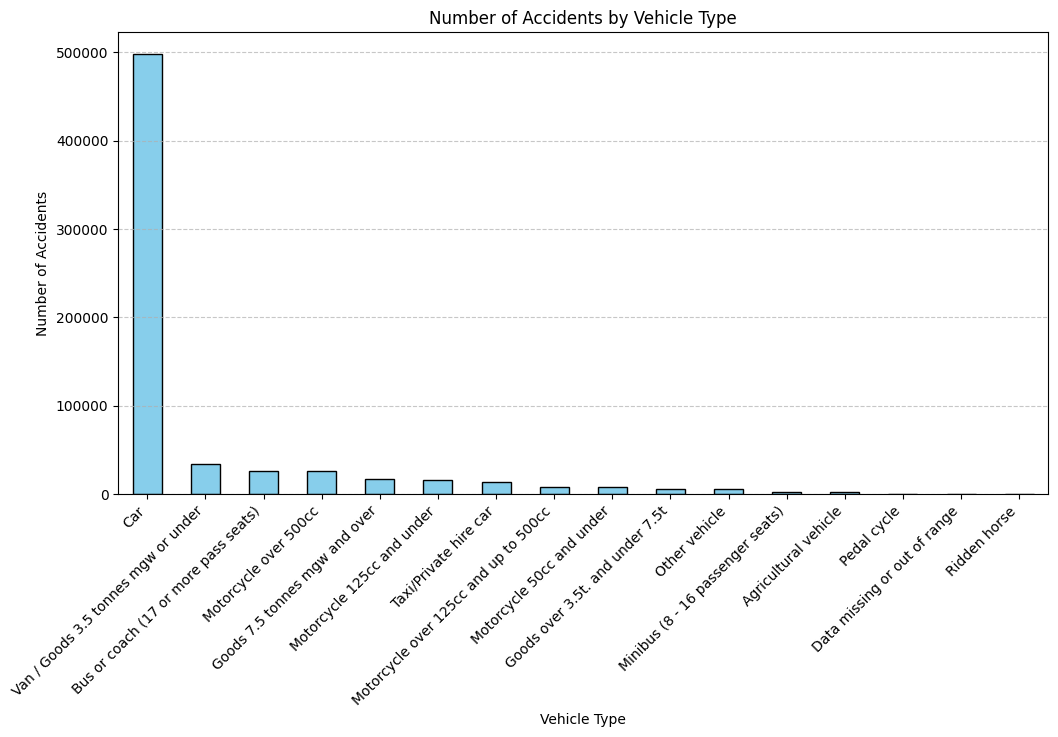

In [118]:
vehicle_accidents = accident.groupby('Vehicle_Type').size().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
vehicle_accidents.plot(kind='bar', color='skyblue', edgecolor='black')


plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Vehicle Type')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<h1>Road Type vs. Number of Accidents</h1>

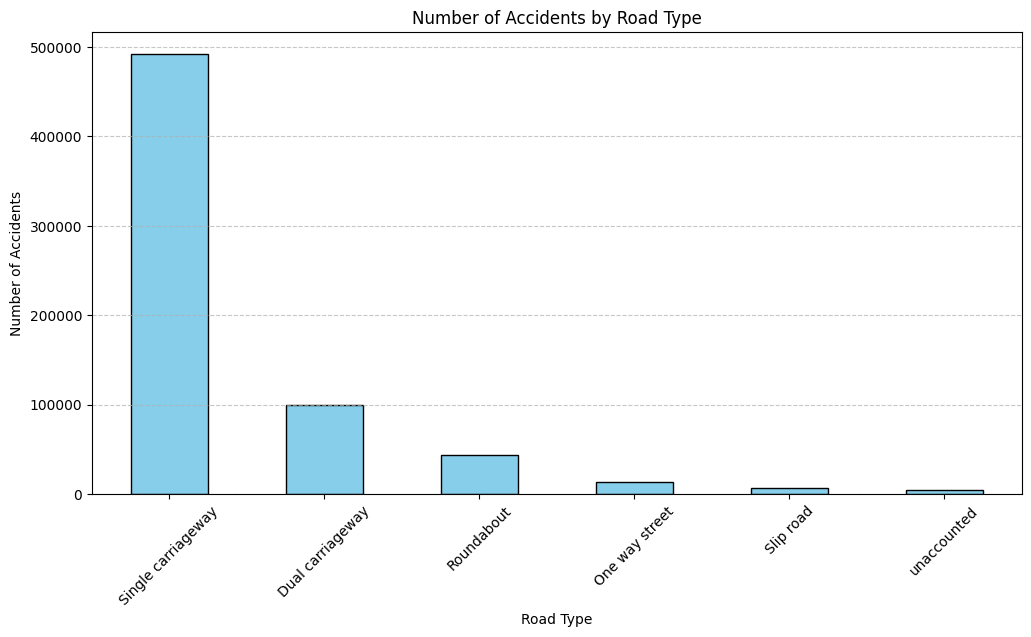

In [122]:
road_type_accidents = accident['Road_Type'].value_counts()


plt.figure(figsize=(12, 6))
road_type_accidents.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Road Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h1>Light Conditions vs. Number of Accidents</h1>

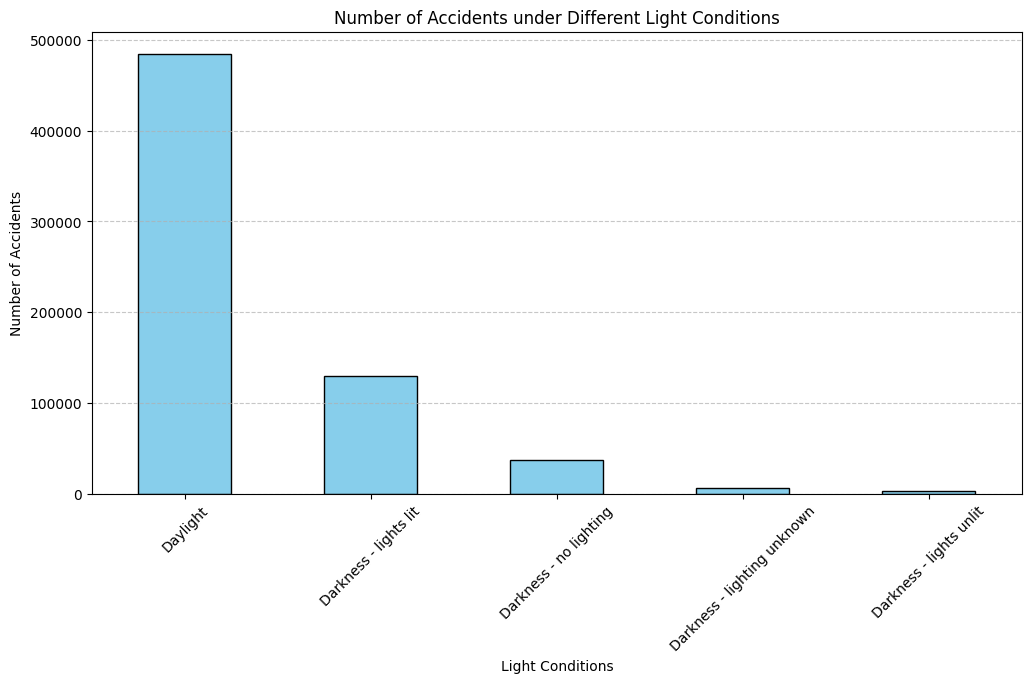

In [124]:
light_conditions = accident.groupby('Light_Conditions').size()

light_conditions = light_conditions.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
light_conditions.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents under Different Light Conditions')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h1>District Area vs. Number of Accidents</h1>

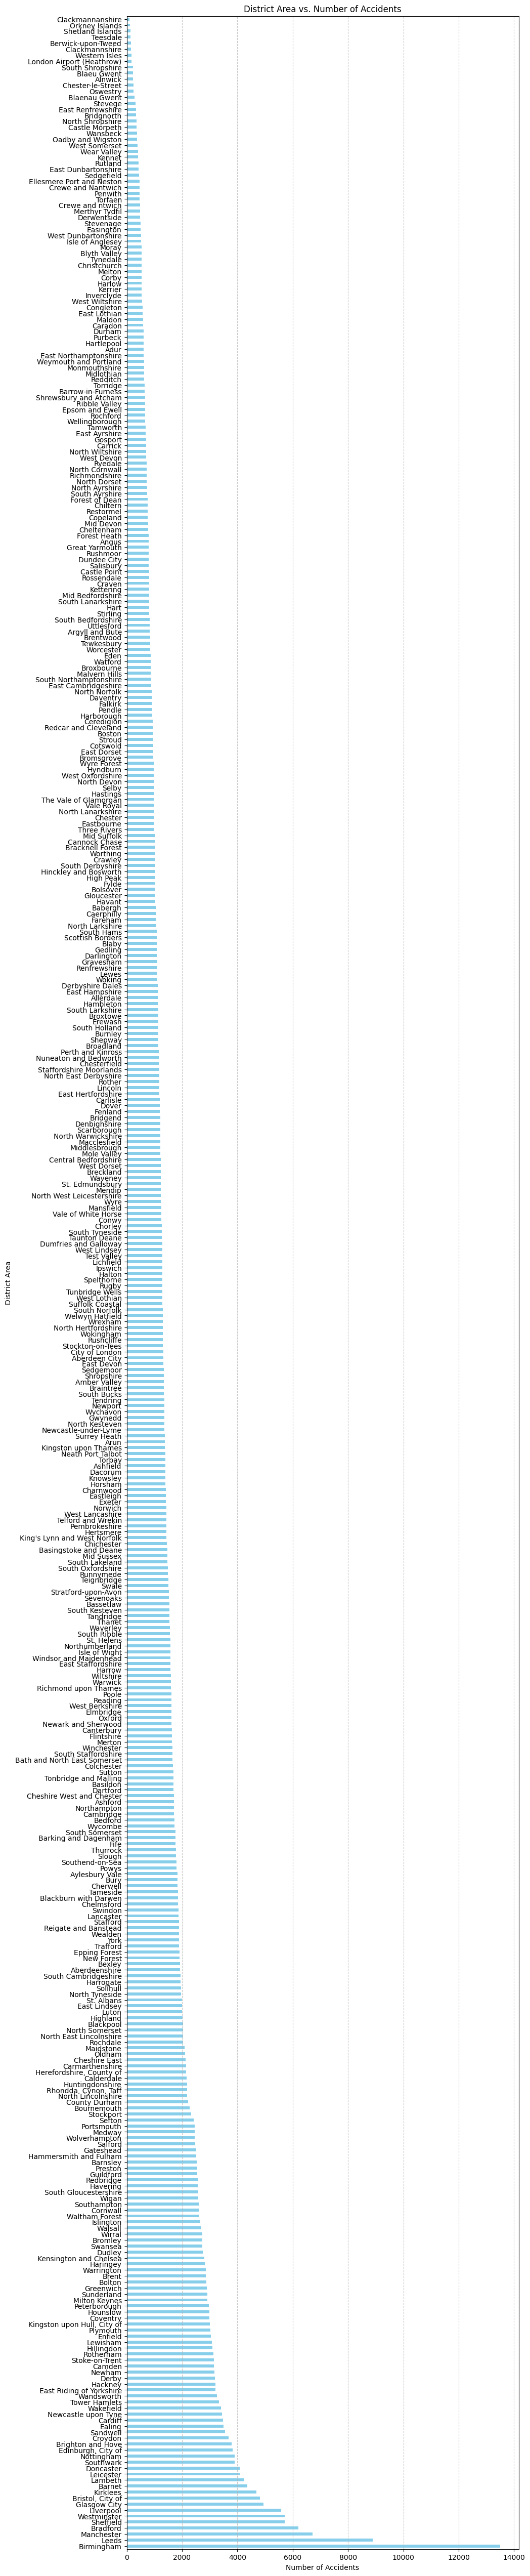

In [132]:
district_accidents = accident['District Area'].value_counts()


plt.figure(figsize=(10, 65))
district_accidents.plot(kind='barh', color='skyblue')


plt.ylabel('District Area') 
plt.xlabel('Number of Accidents')
plt.title('District Area vs. Number of Accidents')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<h1>Accident Severity vs. Average Number of Vehicles Involved</h1>

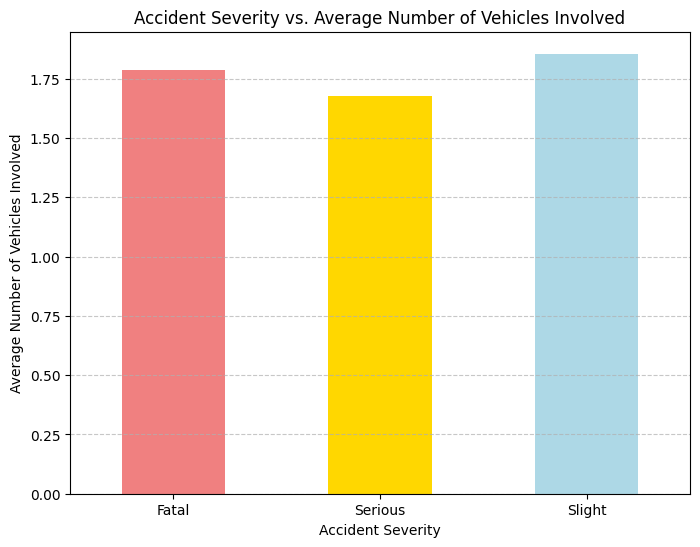

In [133]:
severity_vs_vehicles = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

plt.figure(figsize=(8, 6))
severity_vs_vehicles.plot(kind='bar', color=['lightcoral', 'gold', 'lightblue'])

plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Vehicles Involved')
plt.title('Accident Severity vs. Average Number of Vehicles Involved')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h1>Weather Conditions vs. Number of Accidents</h1>

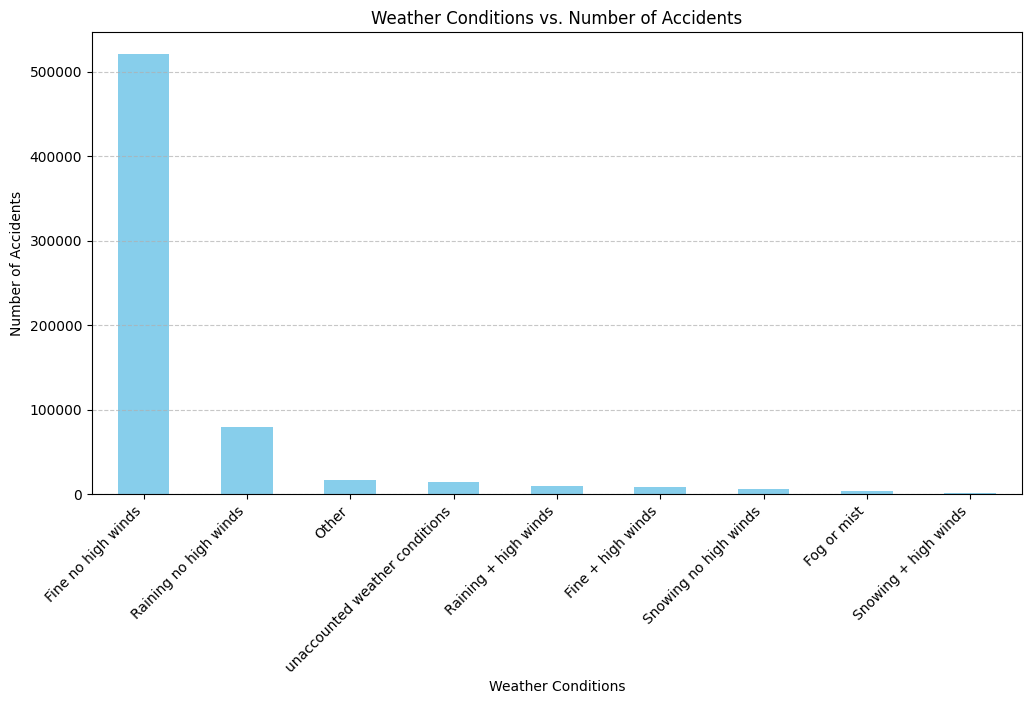

In [134]:
weather_vs_accidents = accident['Weather_Conditions'].value_counts()

plt.figure(figsize=(12, 6))
weather_vs_accidents.plot(kind='bar', color='skyblue')

plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Weather Conditions vs. Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()